In [4063]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [4064]:
data_file = "conso.txt"

In [4065]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [4066]:
text='test'
filename='text.txt'
#save_text(filename)

In [4067]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [4068]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


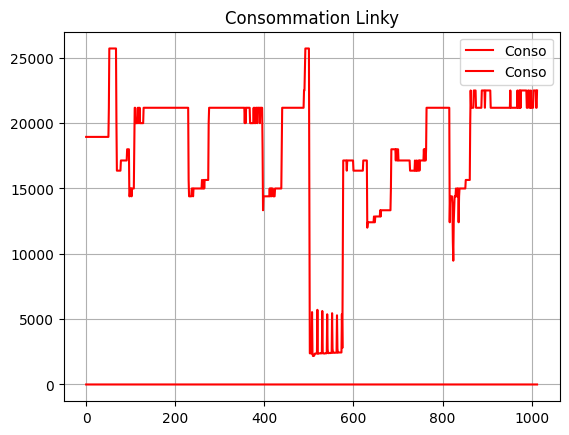

In [4069]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [4070]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [4071]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99121 entries, 0 to 99120
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  99121 non-null  int64  
 1   kWh       99121 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [4072]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
99116,23078,0.16
99117,23255,0.15
99118,23411,0.15
99119,24397,0.15


In [4073]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
99116,23078,0.16,23.078,155.992720,2362827828
99117,23255,0.15,23.255,154.805418,2362851083
99118,23411,0.15,23.411,153.773867,2362874494
99119,24397,0.15,24.397,147.559126,2362898891


In [4074]:
# index dernier echantillon
l=len(conso_data)-1
l

99120

In [4075]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2362923373000

In [4076]:
old

False

In [4077]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 34, 2, 707362)

In [4078]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99121 entries, 0 to 99120
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   99121 non-null  int64         
 1   kWh        99121 non-null  float64       
 2   sec        99121 non-null  float64       
 3   Wh         99121 non-null  float64       
 4   cumul(ms)  99121 non-null  int64         
 5   dates      99121 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 4.5 MB


In [4079]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:34:28.996362,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:34:55.239362,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:35:21.124362,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:35:46.878362,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:36:12.652362,07/03/2024
...,...,...,...,...,...,...,...
99116,23078,0.16,23.078,155.992720,2362827828,2024-04-03 09:54:30.535362,03/04/2024
99117,23255,0.15,23.255,154.805418,2362851083,2024-04-03 09:54:53.790362,03/04/2024
99118,23411,0.15,23.411,153.773867,2362874494,2024-04-03 09:55:17.201362,03/04/2024
99119,24397,0.15,24.397,147.559126,2362898891,2024-04-03 09:55:41.598362,03/04/2024


In [4080]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:34:28.996362   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec         Wh   cumul(ms)  \
 99120     24482  0.15  24.482  147.04681  2362923373   
 
                            dates        days  
 99120 2024-04-03 09:56:06.080362  03/04/2024  )

In [4081]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('03/04/2024', 4, 2024)

In [4082]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
97930,26418,0.14,26.418,136.270725,2327164153,2024-04-03 00:00:06.860362,03/04/2024
97931,25369,0.14,25.369,141.905475,2327189522,2024-04-03 00:00:32.229362,03/04/2024
97932,25778,0.14,25.778,139.653969,2327215300,2024-04-03 00:00:58.007362,03/04/2024
97933,25822,0.14,25.822,139.416002,2327241122,2024-04-03 00:01:23.829362,03/04/2024
97934,25738,0.14,25.738,139.871008,2327266860,2024-04-03 00:01:49.567362,03/04/2024
...,...,...,...,...,...,...,...
99116,23078,0.16,23.078,155.992720,2362827828,2024-04-03 09:54:30.535362,03/04/2024
99117,23255,0.15,23.255,154.805418,2362851083,2024-04-03 09:54:53.790362,03/04/2024
99118,23411,0.15,23.411,153.773867,2362874494,2024-04-03 09:55:17.201362,03/04/2024
99119,24397,0.15,24.397,147.559126,2362898891,2024-04-03 09:55:41.598362,03/04/2024


In [4083]:
## Création d'un DataFrame d'exemple
data = {
    'Name': ['John', 'Anna', 'John', 'Anna', 'John', 'Anna'],
    'Subject': ['Maths', 'Maths', 'Physics', 'Physics', 'Chemistry', 'Chemistry'],
    'Score': [85, 90, 78, 88, 92, 95]
}
 
df = pd.DataFrame(data)
 
## Application de groupby
columns=df.columns
howto = 'Name' 
#howto = 'Subject'
grouped = df.groupby(howto)
for name, group in grouped:
    print("\n", name)
    print(group[[x for x in columns if x!=howto]])


 Anna
     Subject  Score
1      Maths     90
3    Physics     88
5  Chemistry     95

 John
     Subject  Score
0      Maths     85
2    Physics     78
4  Chemistry     92


In [4084]:
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''


'conso_graph=[]\nfor name, group in grouped:\n    if name==\'01/04/2024\':print(group)\n    #print("\n", name, len(group)/1000)\n    conso_graph.append((name,len(group)/1000))'

In [4085]:

mean = conso_df['conso'].mean()
mean


3.5337307692307687

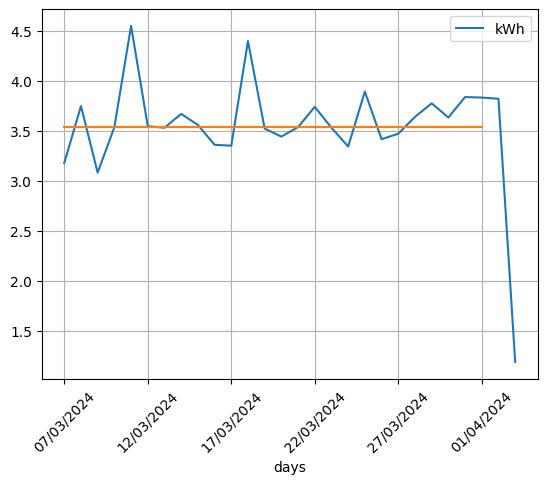

In [4086]:
(grouped.count()/1000).plot()#kind='bar')
plt.plot((0,len(conso_graph)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [4087]:
#manuel
#day = '25/03/2024'


In [4088]:
# conso day
conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

1191

In [4089]:
conso_day.head(1).dates, conso_day.tail(1).dates
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\1879875640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:6,26418,0.14,26.418,136.270725,2327164153,2024-04-03 00:00:06.860362,03/04/2024
0:0:32,25369,0.14,25.369,141.905475,2327189522,2024-04-03 00:00:32.229362,03/04/2024
0:0:58,25778,0.14,25.778,139.653969,2327215300,2024-04-03 00:00:58.007362,03/04/2024
0:1:23,25822,0.14,25.822,139.416002,2327241122,2024-04-03 00:01:23.829362,03/04/2024
0:1:49,25738,0.14,25.738,139.871008,2327266860,2024-04-03 00:01:49.567362,03/04/2024
...,...,...,...,...,...,...,...
9:54:30,23078,0.16,23.078,155.992720,2362827828,2024-04-03 09:54:30.535362,03/04/2024
9:54:53,23255,0.15,23.255,154.805418,2362851083,2024-04-03 09:54:53.790362,03/04/2024
9:55:17,23411,0.15,23.411,153.773867,2362874494,2024-04-03 09:55:17.201362,03/04/2024


In [4090]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:6,26418,0.14,26.418,136.270725,2327164153,2024-04-03 00:00:06.860362,03/04/2024
0:0:32,25369,0.14,25.369,141.905475,2327189522,2024-04-03 00:00:32.229362,03/04/2024
0:0:58,25778,0.14,25.778,139.653969,2327215300,2024-04-03 00:00:58.007362,03/04/2024
0:1:23,25822,0.14,25.822,139.416002,2327241122,2024-04-03 00:01:23.829362,03/04/2024
0:1:49,25738,0.14,25.738,139.871008,2327266860,2024-04-03 00:01:49.567362,03/04/2024
...,...,...,...,...,...,...,...
9:54:30,23078,0.16,23.078,155.992720,2362827828,2024-04-03 09:54:30.535362,03/04/2024
9:54:53,23255,0.15,23.255,154.805418,2362851083,2024-04-03 09:54:53.790362,03/04/2024
9:55:17,23411,0.15,23.411,153.773867,2362874494,2024-04-03 09:55:17.201362,03/04/2024


In [4091]:
filename='conso_jour.csv'
df.to_csv(filename)

In [4016]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('09:54:26', 1.186)

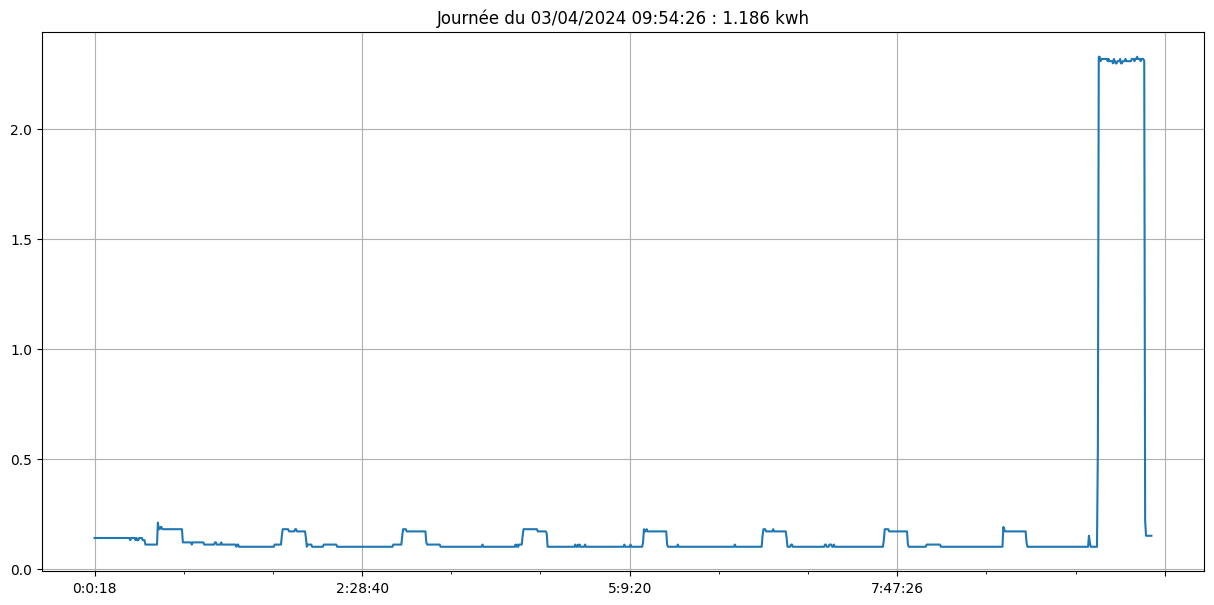

In [4017]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [4018]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [4019]:
df['power']

heure
0:0:18     0.14
0:0:43     0.14
0:1:9      0.14
0:1:35     0.14
0:2:0      0.14
           ... 
9:52:42    0.15
9:53:6     0.15
9:53:30    0.15
9:53:54    0.15
9:54:18    0.15
Name: power, Length: 1186, dtype: float64

<Axes: xlabel='heure'>

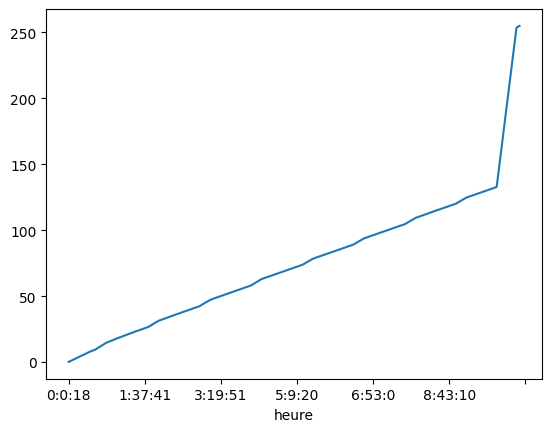

In [4020]:
evo=df['power'].cumsum()
evo.plot()

53

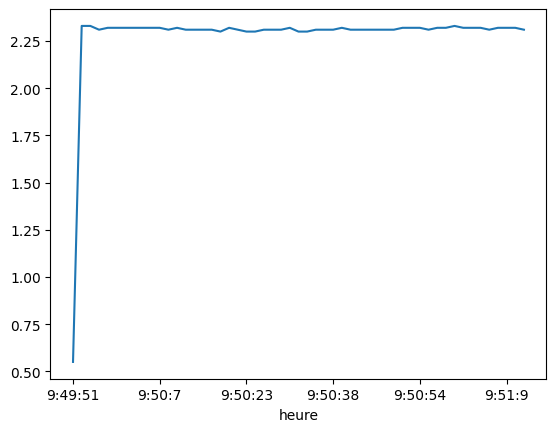

In [4021]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

458

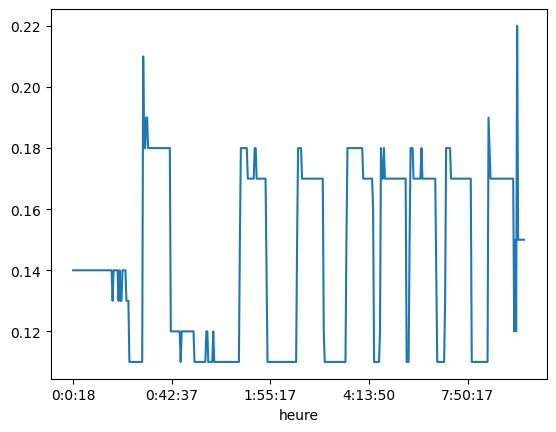

In [4022]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

1133

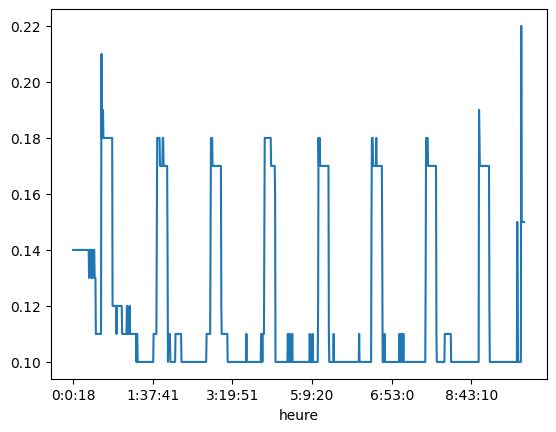

In [4023]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [4024]:
time = conso_data['dates']
time


0       2024-03-07 01:34:40.255546
1       2024-03-07 01:35:06.498546
2       2024-03-07 01:35:32.383546
3       2024-03-07 01:35:58.137546
4       2024-03-07 01:36:23.911546
                   ...            
99111   2024-04-03 09:52:42.216546
99112   2024-04-03 09:53:06.555546
99113   2024-04-03 09:53:30.516546
99114   2024-04-03 09:53:54.455546
99115   2024-04-03 09:54:18.716546
Name: dates, Length: 99116, dtype: datetime64[ns]

In [4025]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [4026]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [4027]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

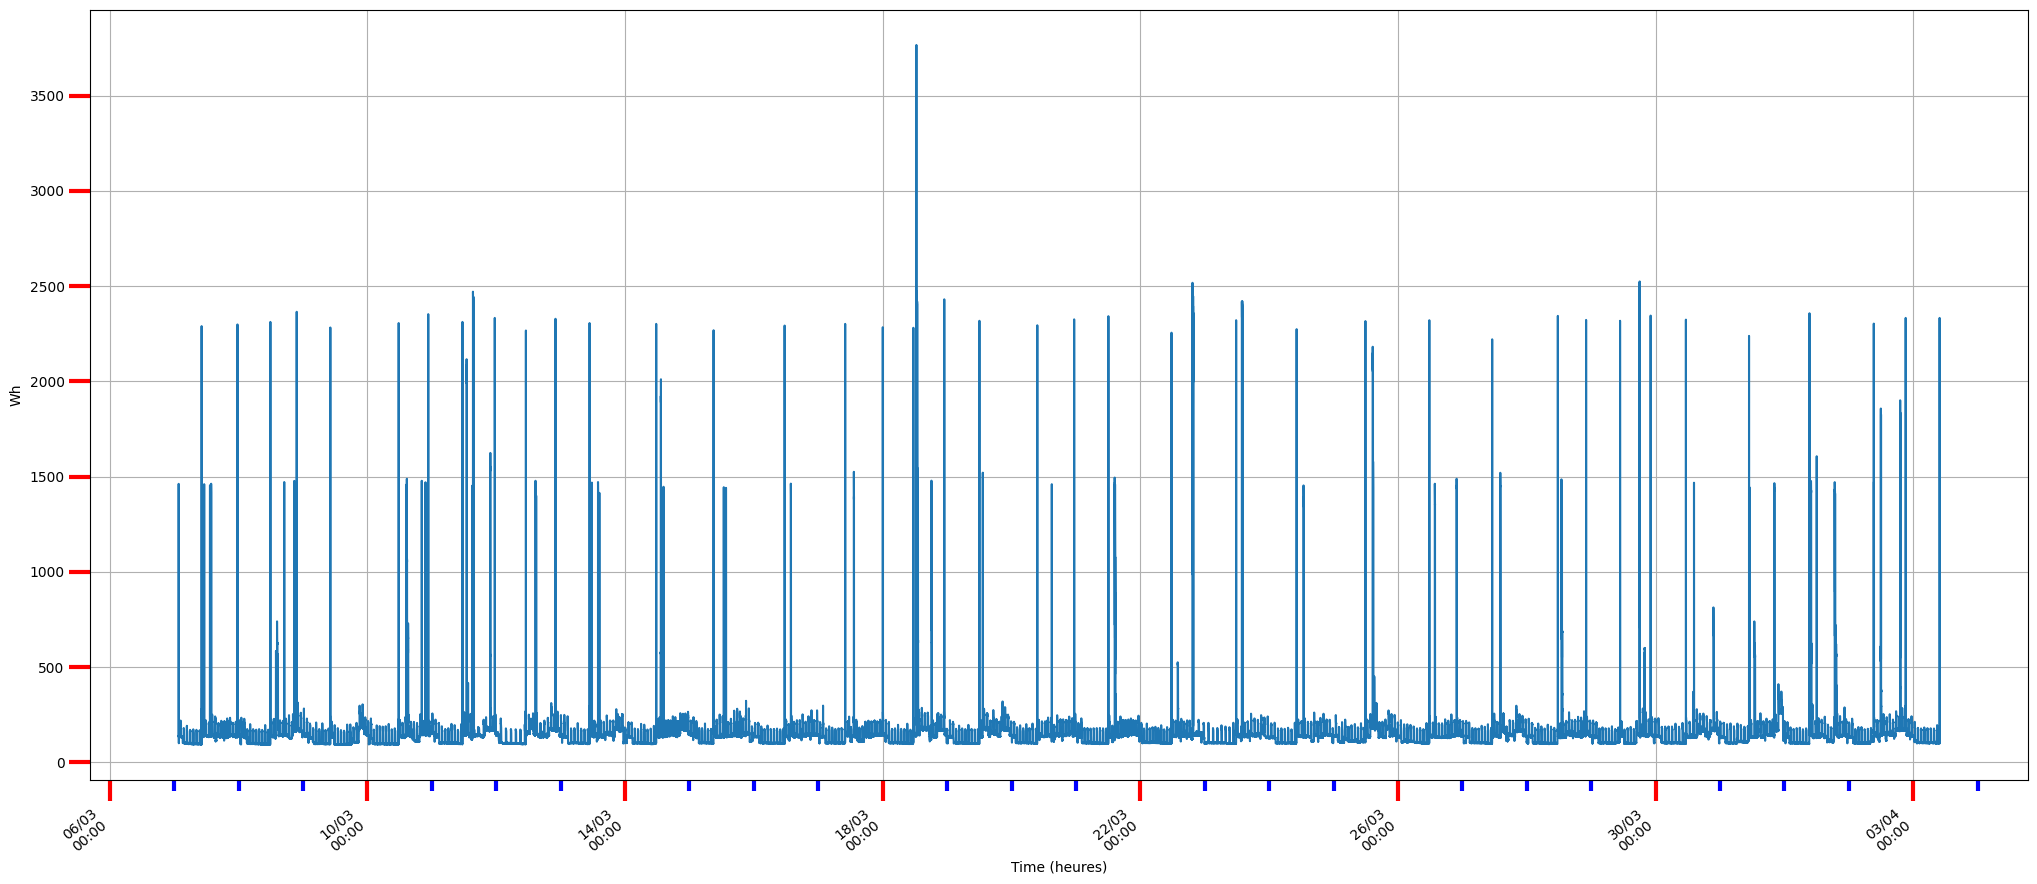

In [4028]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [4029]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
99115,24261,0.15,24.261,148.386299,2362804750,2024-04-03 09:54:18.716546,03/04/2024


In [4030]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2362804750000

# Slice of last 1 kWh

In [4031]:
l = len(conso_data)  # total watt consommés
l

99116

In [4032]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(99116, 1000)

In [4033]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [4034]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 98116     35512  0.10  35.512  101.374183  2332518704   
 98117     35601  0.10  35.601  101.120755  2332554305   
 98118     35539  0.10  35.539  101.297166  2332589844   
 98119     35554  0.10  35.554  101.254430  2332625398   
 98120     35556  0.10  35.556  101.248734  2332660954   
 ...         ...   ...     ...         ...         ...   
 99111     24336  0.15  24.336  147.928994  2362708250   
 99112     24339  0.15  24.339  147.910761  2362732589   
 99113     23961  0.15  23.961  150.244147  2362756550   
 99114     23939  0.15  23.939  150.382221  2362780489   
 99115     24261  0.15  24.261  148.386299  2362804750   
 
                            dates        days  
 98116 2024-04-03 01:29:32.670546  03/04/2024  
 98117 2024-04-03 01:30:08.271546  03/04/2024  
 98118 2024-04-03 01:30:43.810546  03/04/2024  
 98119 2024-04-03 01:31:19.364546  03/04/2024  
 98120 2024-04-03 01:31:54.920546  03/04/2024  
 ...   

In [4035]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [4036]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [4037]:
cumtime_end,cumtime_start

(2362804750000, 2332554305000)

In [4038]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

30250445000

In [4039]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 3, 9, 54, 39, 977609),
 datetime.datetime(2024, 4, 3, 1, 30, 29, 532609),
 '03/04/2024 09:54:18')

In [4040]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:34:40.255546,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:35:06.498546,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:35:32.383546,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:35:58.137546,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:36:23.911546,07/03/2024
...,...,...,...,...,...,...,...
99111,24336,0.15,24.336,147.928994,2362708250,2024-04-03 09:52:42.216546,03/04/2024
99112,24339,0.15,24.339,147.910761,2362732589,2024-04-03 09:53:06.555546,03/04/2024
99113,23961,0.15,23.961,150.244147,2362756550,2024-04-03 09:53:30.516546,03/04/2024
99114,23939,0.15,23.939,150.382221,2362780489,2024-04-03 09:53:54.455546,03/04/2024


In [4041]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('03/04/2024 01:30:08', '03/04/2024 09:54:18')

In [4042]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-03 01:29:32.670546', '2024-04-03 09:54:18.716546')

In [4043]:
k

1

In [4044]:
data.Interval.tail(1000)

98116    35512
98117    35601
98118    35539
98119    35554
98120    35556
         ...  
99111    24336
99112    24339
99113    23961
99114    23939
99115    24261
Name: Interval, Length: 1000, dtype: int64

In [4045]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.422655, 2.8494578016076875, 8, 25, 21)

In [4046]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [4047]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
98116,35512,0.10,35.512,101.374183,2332518704,2024-04-03 01:29:32.670546,03/04/2024,2024-04-03 01:29:32.670546
98117,35601,0.10,35.601,101.120755,2332554305,2024-04-03 01:30:08.271546,03/04/2024,2024-04-03 01:30:08.271546
98118,35539,0.10,35.539,101.297166,2332589844,2024-04-03 01:30:43.810546,03/04/2024,2024-04-03 01:30:43.810546
98119,35554,0.10,35.554,101.254430,2332625398,2024-04-03 01:31:19.364546,03/04/2024,2024-04-03 01:31:19.364546
98120,35556,0.10,35.556,101.248734,2332660954,2024-04-03 01:31:54.920546,03/04/2024,2024-04-03 01:31:54.920546
...,...,...,...,...,...,...,...,...
99111,24336,0.15,24.336,147.928994,2362708250,2024-04-03 09:52:42.216546,03/04/2024,2024-04-03 09:52:42.216546
99112,24339,0.15,24.339,147.910761,2362732589,2024-04-03 09:53:06.555546,03/04/2024,2024-04-03 09:53:06.555546
99113,23961,0.15,23.961,150.244147,2362756550,2024-04-03 09:53:30.516546,03/04/2024,2024-04-03 09:53:30.516546
99114,23939,0.15,23.939,150.382221,2362780489,2024-04-03 09:53:54.455546,03/04/2024,2024-04-03 09:53:54.455546


<Axes: >

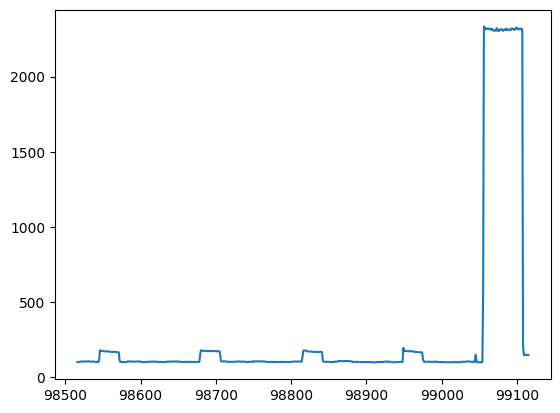

In [4048]:
data.tail(600)['Wh'].plot()

In [4049]:
data['Wh']

98116    101.374183
98117    101.120755
98118    101.297166
98119    101.254430
98120    101.248734
            ...    
99111    147.928994
99112    147.910761
99113    150.244147
99114    150.382221
99115    148.386299
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

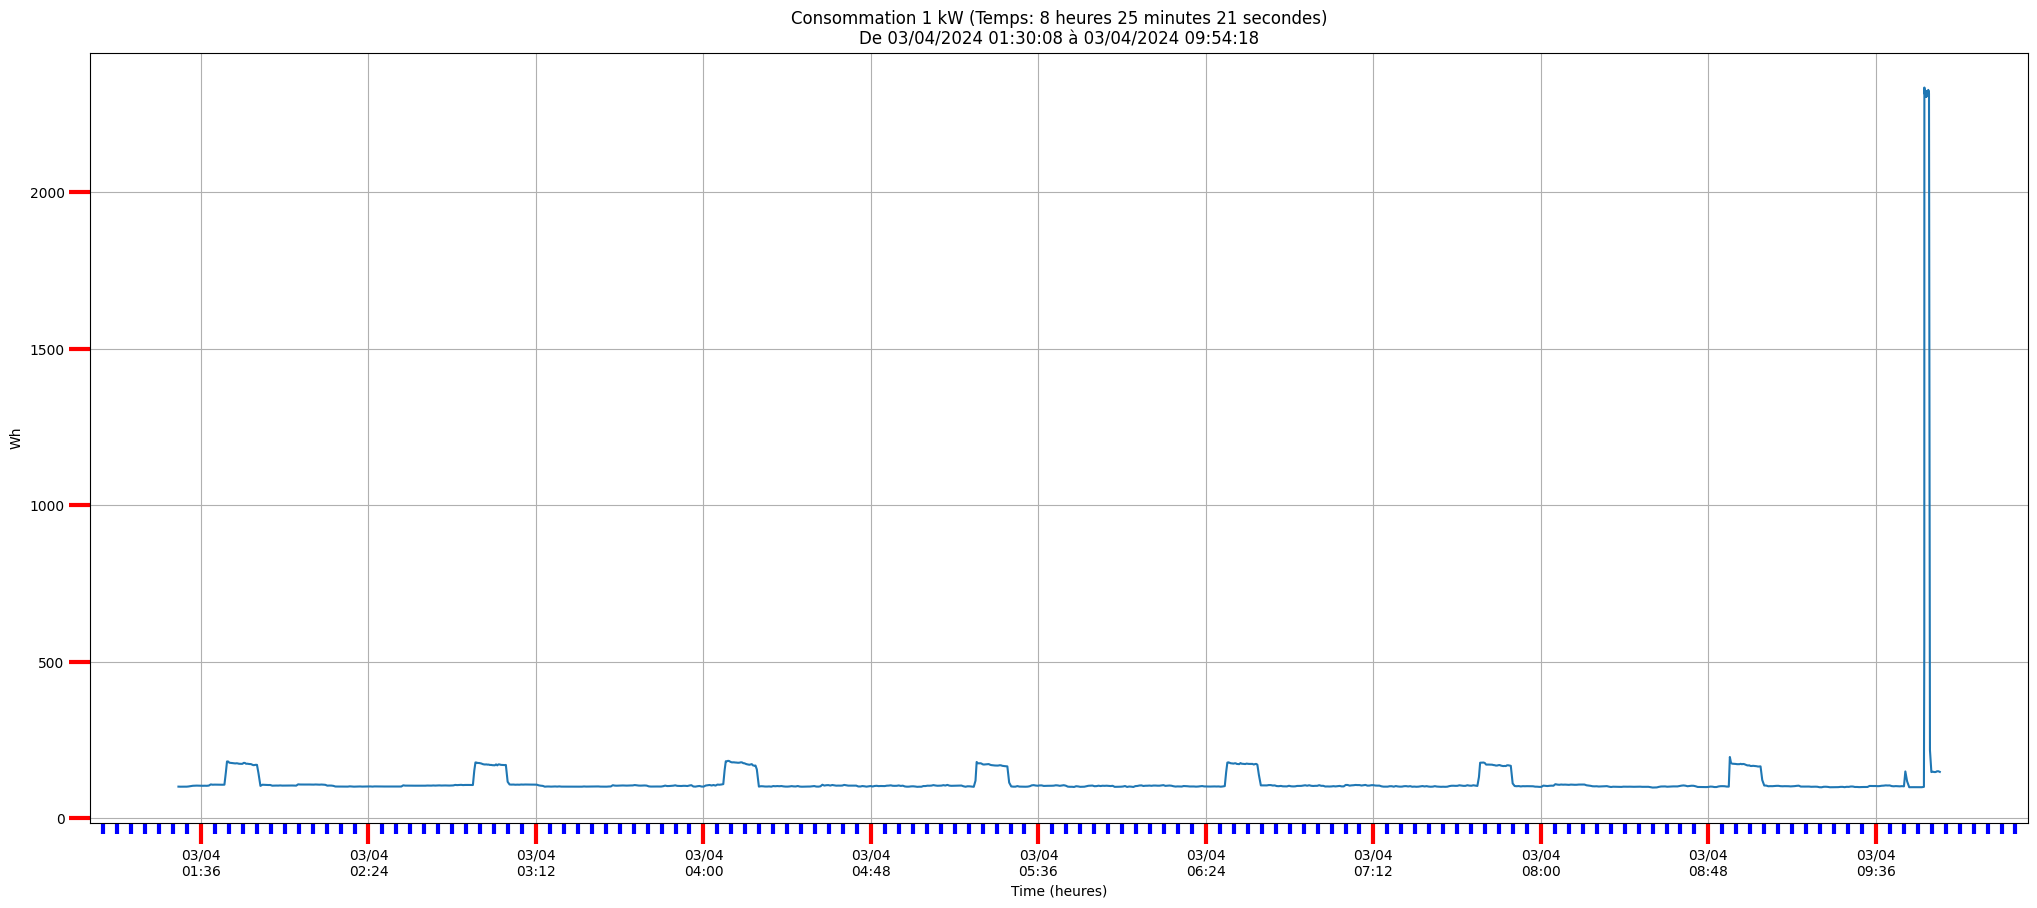

In [4050]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

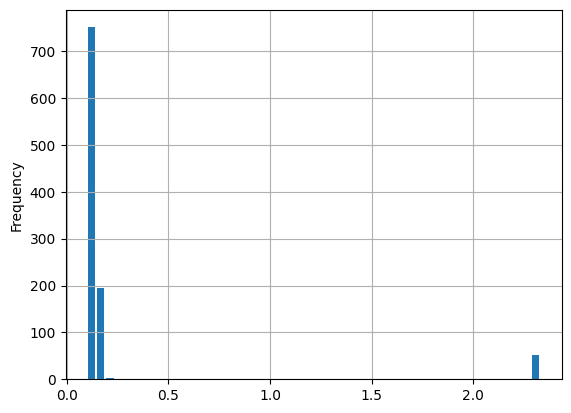

In [4051]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [4052]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
99111,24336,0.15,24.336,147.928994,2362708250,2024-04-03 09:52:42.216546,03/04/2024
99112,24339,0.15,24.339,147.910761,2362732589,2024-04-03 09:53:06.555546,03/04/2024
99113,23961,0.15,23.961,150.244147,2362756550,2024-04-03 09:53:30.516546,03/04/2024
99114,23939,0.15,23.939,150.382221,2362780489,2024-04-03 09:53:54.455546,03/04/2024
99115,24261,0.15,24.261,148.386299,2362804750,2024-04-03 09:54:18.716546,03/04/2024


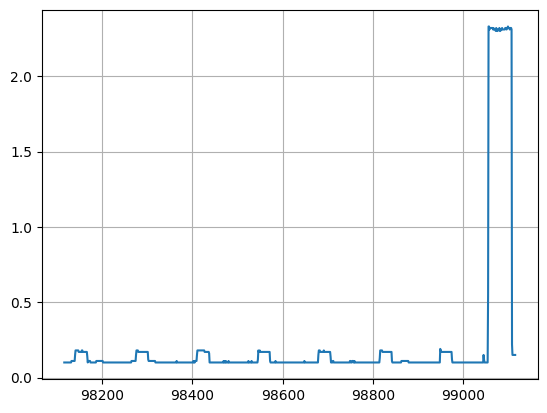

In [4053]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [4054]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(2362804750000.0, 39380.07916666667)

In [4055]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 3, 9, 54, 44, 261027),
 datetime.datetime(2024, 3, 7, 1, 34, 39, 511027))

In [4056]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(99116, 2362805, 656.3347222222222)

In [4057]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [4058]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [4059]:
732/12 # 60 jours

61.0

In [4060]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

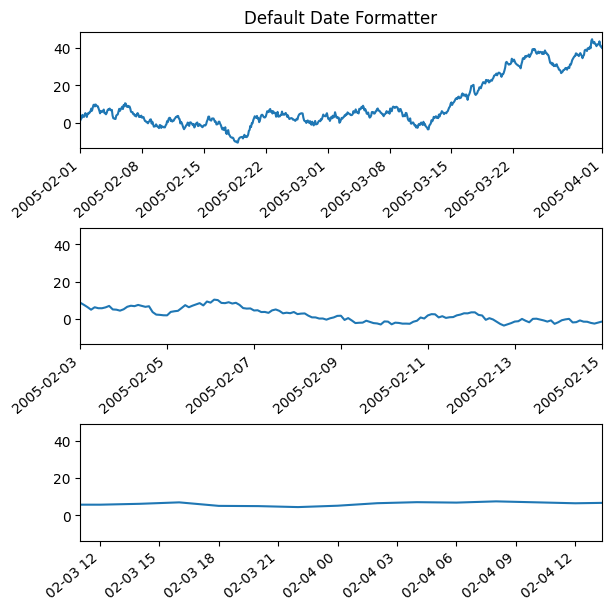

In [4061]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [4062]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)